In [38]:
import json
from itertools import permutations
from tqdm import tqdm
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import py2neo

# EDA

In [2]:
!ls

check_data.ipynb                   test.json.zip
recipes_with_nutritional_info.json train.json
sample_submission.csv.zip          train.json.zip
test.json


In [3]:
with open('train.json','r') as file:
    data = json.load(file)

In [4]:
def create_permutations(ingredients):
    length = len(ingredients)
    permutation_list = []
    for idx,i in enumerate(permutations(ingredients,length)):
        permutation_list.append(i)
        if idx==99:
            break
    return permutation_list

In [5]:
ing_list = []
for datapoint in tqdm(data):
    ing_list+=list(set(datapoint['ingredients']))
    
    
print("Number of ingredients:",len(set(ing_list)))
d = dict(Counter(ing_list))

dd = {'ingredient':[],'number_of_occurences':[]}

for k,v in d.items():
    dd['ingredient'].append(k)
    dd['number_of_occurences'].append(v)
    
df = pd.DataFrame(dd)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 39774/39774 [00:00<00:00, 133620.92it/s]


Number of ingredients: 6714


In [6]:
nonos = df.loc[df.number_of_occurences<3].ingredient.values.tolist()

In [35]:
len(data)

39774

In [33]:
# Creating permuted dataset
expanded_dataset = []
ids = []
dropped = []
trimmed_dataset = []


for datapoint in tqdm(data):
    cont = False
    for i in datapoint['ingredients']:
        if i in nonos:
            dropped.append(datapoint)
            cont = True
            break
    if cont:  
        continue
    trimmed_dataset.append(datapoint)
    permutation_list = create_permutations(datapoint['ingredients'])
    for p in permutation_list:
        expanded_dataset.append({'id':datapoint['id'],
                                 'cuisine':datapoint['cuisine'],
                                 'ingredients':list(p)})
        
        ids.append(datapoint['id'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 39774/39774 [00:29<00:00, 1370.17it/s]


In [8]:
len(trimmed_dataset)

424921

In [9]:
len(expanded_datasetanded_datasetanded_datasetanded_datasetanded_dataset)

3818974

In [40]:
len(dropped)/len(data)*100

8.43264444109217

In [42]:
nonos

['white almond bark',
 'Johnsonville Andouille Dinner Sausage',
 'jambalaya rice mix',
 'lemon olive oil',
 'Taiwanese bok choy',
 'membrillo',
 'chestnut flour',
 'cinnamon graham crackers',
 'hibiscus',
 'chorizo spanish',
 'instant butterscotch pudding mix',
 'myzithra',
 'Guinness Lager',
 'Franks Hot Sauce',
 'mushroom powder',
 'kashmiri chile',
 'pecan pie',
 'karashi',
 'whole grain thin spaghetti',
 'blueberri preserv',
 'wish bone guacamol ranch dress',
 'light brown muscavado sugar',
 'chinese black bean',
 'liquorice',
 'lamb neck fillets',
 'Old El Paso™ mild red enchilada sauce',
 'mini cucumbers',
 'italian style rolls',
 'branzino fillets',
 'carbonated beverages',
 'Sargento® Traditional Cut Shredded Mozzarella Cheese',
 'erythritol',
 'yellowtail',
 'arame',
 'lemon cucumber',
 'sesame salt',
 'aged gouda',
 'pasta rotel',
 'McCormick Parsley Flakes',
 'lemon soda',
 'annatto oil',
 'Crystal Farms Butter',
 'Crystal Farms Shredded Gouda Cheese',
 'fresh mexican cheese

In [41]:
dropped[0]

{'id': 3735,
 'cuisine': 'italian',
 'ingredients': ['sugar',
  'pistachio nuts',
  'white almond bark',
  'flour',
  'vanilla extract',
  'olive oil',
  'almond extract',
  'eggs',
  'baking powder',
  'dried cranberries']}

In [11]:
len(expanded_dataset)

3818974

In [30]:
ing_list = []
for datapoint in tqdm(data):
    ing_list+=list(set(datapoint['ingredients']))
    
    
print("Number of ingredients:",len(set(ing_list)))
d = dict(Counter(ing_list))

dd = {'ingredient':[],'number_of_occurences':[]}

for k,v in d.items():
    dd['ingredient'].append(k)
    dd['number_of_occurences'].append(v)
    
df = pd.DataFrame(dd)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39774/39774 [00:00<00:00, 472235.42it/s]

Number of ingredients: 6714


In [24]:
print(df.shape[0])
print(df.loc[df['number_of_occurences']>1].shape[0])
print(df.loc[df['number_of_occurences']>2].shape[0])
print(df.loc[df['number_of_occurences']>2].shape[0])

6714
4955
4159


<AxesSubplot: ylabel='Frequency'>

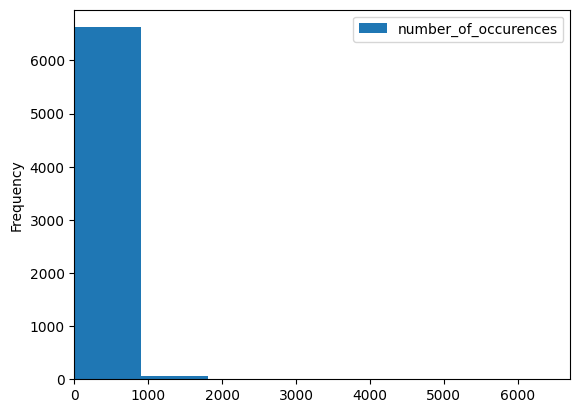

In [27]:
df.sort_values('number_of_occurences',ascending=False).plot(kind='hist',bins=20,xlim=[0,6714])

In [31]:
df.sort_values('number_of_occurences',ascending=False)

,ingredient,number_of_occurences
15,salt,18048
31,onions,7972
60,olive oil,7971
29,water,7457
4,garlic,7380
...,...,...
5035,sauerkraut juice,1
5034,no-calorie sweetener,1
5033,Bob Evans Italian Sausage,1
5022,extra firm silken tofu,1


In [27]:
ll2 = list(set(ll))

In [29]:
ll2[0]

('feta cheese crumbles',
 'garlic',
 'seasoning',
 'garbanzo beans',
 'black olives',
 'purple onion',
 'grape tomatoes',
 'romaine lettuce',
 'pepper')

In [30]:
ll2[1]

('seasoning',
 'romaine lettuce',
 'grape tomatoes',
 'garlic',
 'pepper',
 'black olives',
 'purple onion',
 'feta cheese crumbles',
 'garbanzo beans')

## Cuisine EDA

In [5]:
cuisine_dict = defaultdict(dict)

for d in data:
    if 'num_recipes' not in cuisine_dict[d['cuisine']]:
        cuisine_dict[d['cuisine']]['num_recipes']=1
        cuisine_dict[d['cuisine']]['ingredient_lists'] = [d['ingredients']]
    else:
        cuisine_dict[d['cuisine']]['num_recipes']+=1
        cuisine_dict[d['cuisine']]['ingredient_lists'] += [d['ingredients']]

    
    

In [6]:
cuisine_d_df = {'cuisine':[],
                'num_recipes':[],
                'avg_num_ingredients':[],
                'min_num_ingredients':[]}

for k,v in cuisine_dict.items():
    cuisine_d_df['cuisine'].append(k)
    cuisine_d_df['num_recipes'].append(v['num_recipes'])
    
    ing_lens = [len(i) for i in v['ingredient_lists']]
    
    cuisine_d_df['avg_num_ingredients'].append(sum(ing_lens)/len(ing_lens))
    cuisine_d_df['min_num_ingredients'].append(min(ing_lens))


cuisine_df = pd.DataFrame(cuisine_d_df)
cuisine_df

,cuisine,num_recipes,avg_num_ingredients,min_num_ingredients
0,greek,1175,10.182128,1
1,southern_us,4320,9.634954,1
2,filipino,755,10.000000,2
3,indian,3003,12.705961,1
4,jamaican,526,12.214829,2
5,spanish,989,10.423660,1
6,italian,7838,9.909033,1
7,mexican,6438,10.877446,1
8,chinese,2673,11.982791,2
9,british,804,9.708955,2


<AxesSubplot: xlabel='cuisine'>

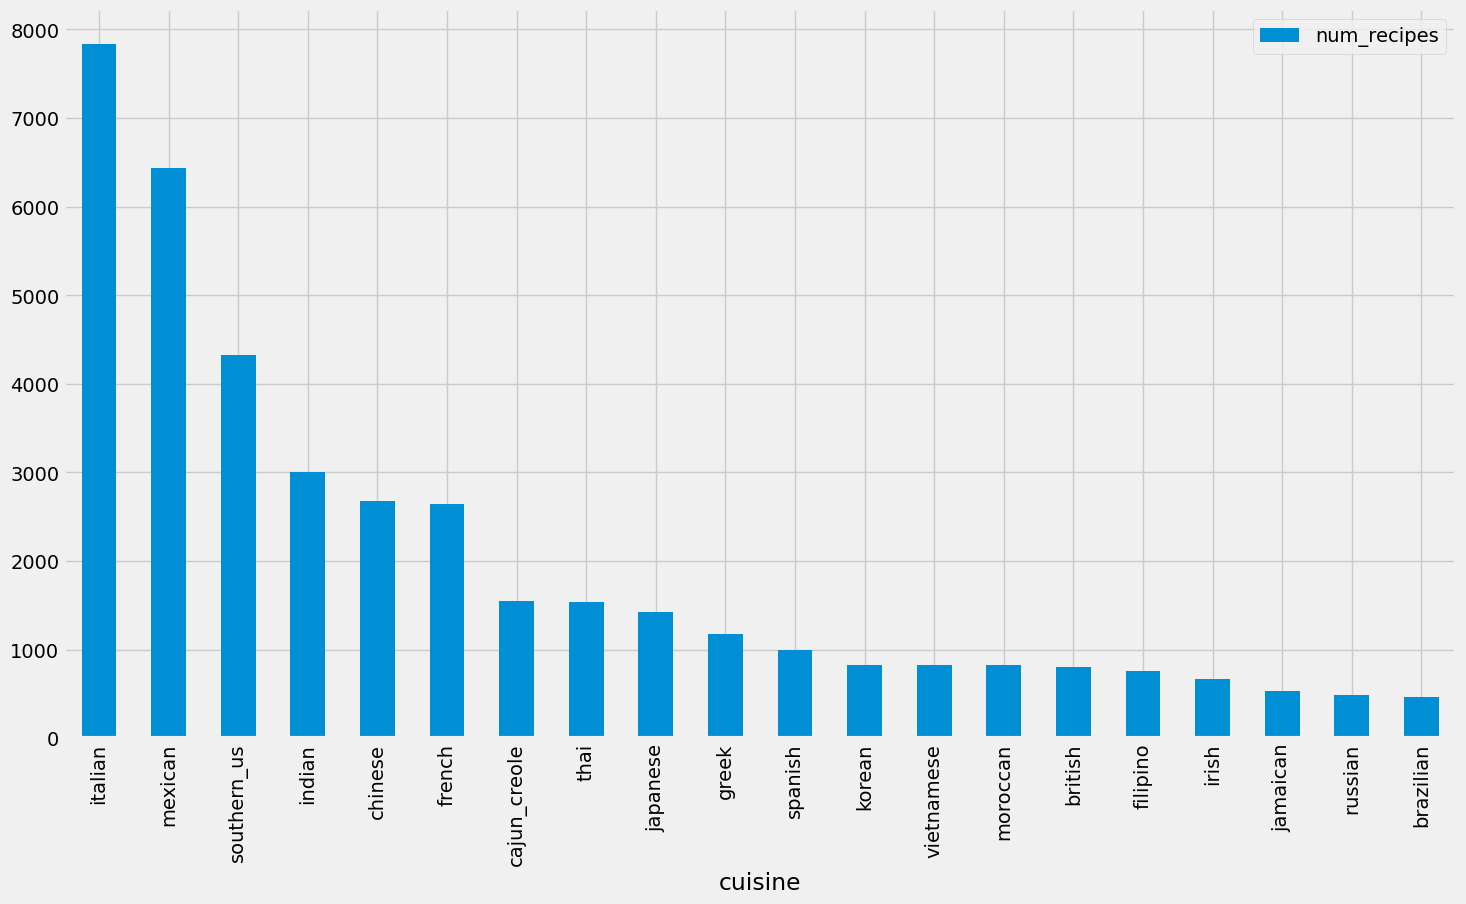

In [7]:
plt.style.use('fivethirtyeight')
cuisine_df.sort_values('num_recipes',ascending=False).plot(kind='bar',x='cuisine',y='num_recipes',figsize=[16,9])

In [36]:
bipartite_G = nx.Graph()
edge_dict = defaultdict(int)
for d in trimmed_dataset:
    bipartite_G.add_nodes_from([(str(d['id']),{'cuisine':d['cuisine']})]+[(ing) for ing in d['ingredients']])
    for ing in d['ingredients']:
        edge_dict[str(d['id'])+'|'+ing]+=1

        
for e,w in edge_dict.items():
    e1,e2 = tuple(e.split('|'))
    
    bipartite_G.add_edges_from([(e1,e2,{'weight':w})])

In [20]:
degs = nx.degree(bipartite_G)

In [21]:
sorted_d = {k: v for k, v in sorted(dict(degs).items(), key=lambda item: item[1],reverse=True)}

In [22]:
def projection():
    pass

In [23]:
from networkx.algorithms import bipartite
recipes = list(set([k.split('|')[0] for k in edge_dict.keys()]))

In [24]:
#G = bipartite.projected_graph(bipartite_G, recipes, multigraph=True)

In [25]:
data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [37]:
print(nx.info(bipartite_G))

Graph with 40854 nodes and 393284 edges


/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_3394/437543529.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(bipartite_G))


In [16]:
bipartite_G.degree('avocado')

1228

In [57]:
resource = nx.resource_allocation_index(bipartite_G, n_list)

In [58]:
n_list[0]

('21768', '23213')

In [59]:
for u, v,p in resource:
    print(u,v,p)
    break

21768 23213 0.0012804097311139564


In [ ]:
n_list = []
for r in tqdm(recipes):
    for k in bipartite_G.neighbors(r):
        n_list+=[(recipes[0],i) for i in bipartite_G.neighbors(k)]
    
n_list = list(set(n_list))

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 31782/39774 [04:02<01:00, 132.84it/s]

In [ ]:
resource = nx.resource_allocation_index(bipartite_G, n_list)

In [ ]:
ra_graph = nx.Graph()
for u, v,p in tqdm(resource):
    ra_graph.add_edges_from([(u,v,{'weight':p})])